In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# get the data
filname = 'F:/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('F:/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [4]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y


In [5]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
#Visualizing the image and the respective expression

Happy


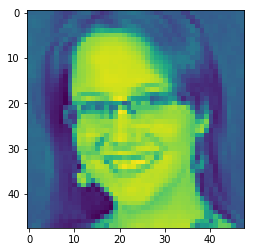

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X[7].reshape(48,48))
print(label_map[Y[7]])

In [6]:

N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Splitting the dataset into train and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
y_train=(np.arange(num_class)==y_train[:,None]).astype(np.float32)
y_test=(np.arange(num_class)==y_test[:,None]).astype(np.float32)

In [ ]:
# Constructing a CNN model

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(48,48,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [21]:
from tensorflow.keras.optimizers import RMSprop,Adam

In [22]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
path_model='F:/fer_model_checkpoint/model_filter.h5'
history=model.fit(x=X_train,
                 y=y_train,
                 batch_size=128,
                 epochs=20,
                 verbose=1,
                 validation_data=(X_test,y_test),
                 callbacks=[(ModelCheckpoint(filepath=path_model))])

Train on 28709 samples, validate on 7178 samples
Epoch 1/20
28709/28709 [==============================] - 17s 583us/sample - loss: 1.7835 - acc: 0.2634 - val_loss: 1.7006 - val_acc: 0.3342
Epoch 2/20
28709/28709 [==============================] - 16s 558us/sample - loss: 1.5465 - acc: 0.3947 - val_loss: 1.4643 - val_acc: 0.43160.3 - ETA
Epoch 3/20
28709/28709 [==============================] - 15s 528us/sample - loss: 1.4022 - acc: 0.4601 - val_loss: 1.4176 - val_acc: 0.4574
Epoch 4/20
28709/28709 [==============================] - 14s 492us/sample - loss: 1.3168 - acc: 0.4937 - val_loss: 1.3244 - val_acc: 0.4997
Epoch 5/20
28709/28709 [==============================] - 16s 543us/sample - loss: 1.2571 - acc: 0.5204 - val_loss: 1.2763 - val_acc: 0.5124
Epoch 6/20
28709/28709 [==============================] - 16s 542us/sample - loss: 1.2131 - acc: 0.5385 - val_loss: 1.2475 - val_acc: 0.5298
Epoch 7/20
28709/28709 [==============================] - 16s 566us/sample - loss: 1.1726 - acc:

In [ ]:
# We have achieved top three validation score of 57.50%, 56.92% and 56.83%

In [25]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Adding a Dropout layer to the existing model architecture

In [27]:

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(48,48,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
    
])
model.summary()
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)         

In [3]:
# Applying the image augmentation technique

In [28]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
path_model='model_filter.h5'
model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),
                   epochs=30,validation_data=(X_test,y_test),
                 callbacks=[(ModelCheckpoint(filepath=path_model))],verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 225 steps, validate on 7178 samples
Epoch 1/30
225/225 [==============================] - 17s 77ms/step - loss: 1.7665 - acc: 0.2689 - val_loss: 1.8130 - val_acc: 0.2488
Epoch 2/30
225/225 [==============================] - 17s 76ms/step - loss: 1.6266 - acc: 0.3489 - val_loss: 1.7365 - val_acc: 0.3072
Epoch 3/30
225/225 [==============================] - 22s 96ms/step - loss: 1.5062 - acc: 0.4097 - val_loss: 1.6991 - val_acc: 0.3472
Epoch 4/30
225/225 [==============================] - 21s 95ms/step - loss: 1.4356 - acc: 0.4459 - val_loss: 1.6442 - val_acc: 0.3579
Epoch 5/30
225/225 [==============================] - 23s 101ms/step - loss: 1.3928 - acc: 0.4592 - val_loss: 1.6083 - val_acc: 0.3713
Epoch 6/30
225/225 [==============================] - 22s 96ms/step - loss: 1.3563 - acc: 0.4783 - val_loss: 1.5620 - val_acc: 0.3794
Epoch 7/30
225/225 [============================

In [4]:
# With image augmentation technique we have got top three validation score of, 47.77%, 46.28%,45.89%

In [73]:
#Adding two Dropout layers to the existing CNN model
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(48,48,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
    
])
model.summary()
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_25 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 4, 4, 64)        

In [74]:
history=model.fit(x=X_train,
                 y=y_train,
                 batch_size=128,
                 epochs=30,
                 verbose=1,
                 validation_data=(X_test,y_test))

Train on 28709 samples, validate on 7178 samples
Epoch 1/30
28709/28709 [==============================] - 18s 624us/sample - loss: 1.7741 - acc: 0.2740 - val_loss: 1.6139 - val_acc: 0.3695
Epoch 2/30
28709/28709 [==============================] - 17s 577us/sample - loss: 1.5385 - acc: 0.3976 - val_loss: 1.4402 - val_acc: 0.4384
Epoch 3/30
28709/28709 [==============================] - 16s 571us/sample - loss: 1.4130 - acc: 0.4553 - val_loss: 1.3565 - val_acc: 0.4791
Epoch 4/30
28709/28709 [==============================] - 16s 570us/sample - loss: 1.3269 - acc: 0.4883 - val_loss: 1.3093 - val_acc: 0.4879
Epoch 5/30
28709/28709 [==============================] - 16s 575us/sample - loss: 1.2695 - acc: 0.5130 - val_loss: 1.2525 - val_acc: 0.5199
Epoch 6/30
28709/28709 [==============================] - 16s 568us/sample - loss: 1.2189 - acc: 0.5359 - val_loss: 1.2786 - val_acc: 0.5074
Epoch 7/30
28709/28709 [==============================] - 16s 573us/sample - loss: 1.1835 - acc: 0.5464 -

In [5]:
# We have got top three validation scores of, 57.52%,57.27%, and 57.11%